In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import pycomlink as pycml

import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

No handlers could be found for logger "shapely.geos"


In [4]:
cml_list = pycml.io.examples.read_cml_list()

75 CMLs read in


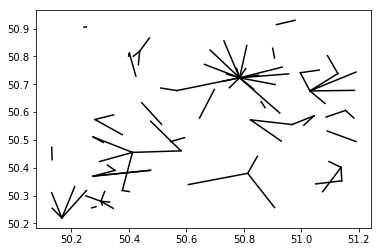

In [5]:
fig, ax = plt.subplots()
for cml in cml_list:
    cml.plot_line(ax=ax, color='k')

In [6]:
for cml in tqdm_notebook(cml_list):
    window_length = 60
    threshold = 1.0
    cml.process.wet_dry.std_dev(window_length=window_length, threshold=threshold)
    cml.process.baseline.linear()
    cml.process.baseline.calc_A()
    cml.process.A_R.calc_R()

A Jupyter Widget

In [53]:
cml_interp = pycml.spatial.interpolator.ComlinkGridInterpolator(
    cml_list=cml_list,
    resolution=0.01,
    interpolator=pycml.spatial.interpolator.IdwKdtreeInterpolator())

zgrids = cml_interp.loop_over_time()

100%|██████████| 48/48 [00:00<00:00, 151.06it/s]


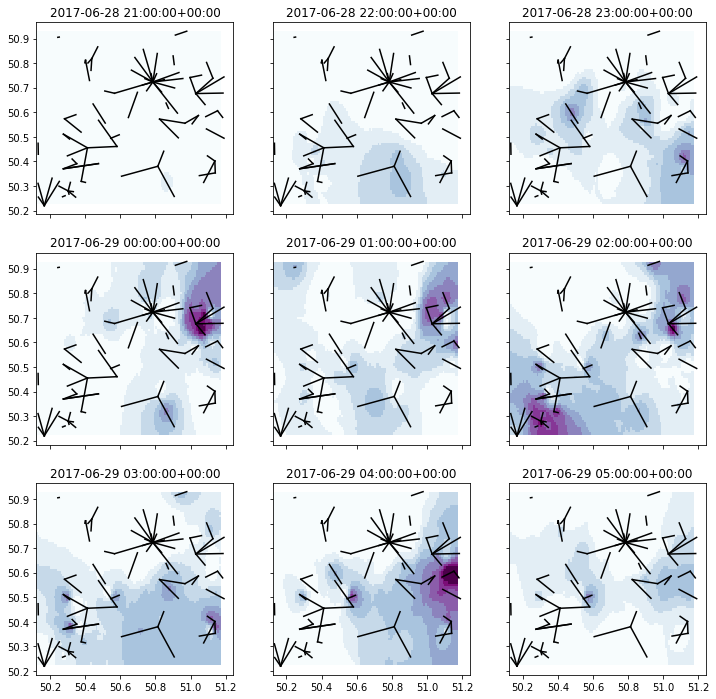

In [54]:
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(12,12))

for i, axi in enumerate(ax.flat):
    for cml in cml_list:
        cml.plot_line(ax=axi, color='k')
    
    pc = axi.pcolormesh(cml_interp.xgrid,
                        cml_interp.ygrid,
                        zgrids[20+i], 
                        cmap=plt.get_cmap('BuPu', 10), 
                        vmin=0,
                        vmax=20)
    axi.set_title(cml_interp.df_cmls.index[20+i])
#    plt.colorbar(pc)

In [56]:
cml_interp = pycml.spatial.interpolator.ComlinkGridInterpolator(
    cml_list=cml_list,
    resolution=0.01,
    interpolator=pycml.spatial.interpolator.OrdinaryKrigingInterpolator(backend='loop'))

zgrids = cml_interp.loop_over_time()

 46%|████▌     | 22/48 [00:13<00:21,  1.18it/s]/Users/local_user/miniconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 9.88732453823e-22
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/local_user/miniconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.57594317415e-22
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/local_user/miniconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.57594317414e-22
  ' condition number: {}'.format(rcond), RuntimeWarning)


LinAlgError: Matrix is singular.

In [ ]:
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(12,12))

for i, axi in enumerate(ax.flat):
    for cml in cml_list:
        cml.plot_line(ax=axi, color='k')
    
    pc = axi.pcolormesh(cml_interp.xgrid,
                        cml_interp.ygrid,
                        zgrids[20+i], 
                        cmap=plt.get_cmap('BuPu', 10), 
                        vmin=0,
                        vmax=20)
    axi.set_title(cml_interp.df_cmls.index[20+i])
#    plt.colorbar(pc)